# Multiple Linear Regression On A Delivery Time Data Set

### Jacob Perzhilla

### D214

### August 7, 2024

### A. RESEARCH QUESTION

The research question for this project is: Can a Multiple Linear Regression Model effectively predict DoorDash delivery time? 

The benefits of this project as for a data analysis would be to maximize efficiency for the users of DoorDash. As DoorDash does not provide items itself but, it does provide service (DoorDash, 2020). In this study, a (multiple) linear regression will be preformed as to understand what variables and how much affect those variables have on the delivery time of a DoorDash order. This is great as linear regression takes predictive variables, and then gives an output (IBM, 2021). If it is possible to understand the variables that affect delivery time, DoorDash will be able to offer better service to its customers. 

This data comes from DoorDash itself in early 2015, containing the orgination time of the order and actual time the order was delivered. Along with this, comes variables like the maximum item price, the amount of dashers in the area, number of items in the order, etc. With these variables, in a linear regression model it should allow a researcher to understand how certain variables affect the target variable (total delivery time). If, a regression model with an R squared value above 0.75, then the model has great explantory power. So, that will be the goal of the analysis.   

So with that, the null and alternative hypothesis will be as follows:

Null hypothesis- A Multiple Linear Regression model cannot predict delivery time with a R Squared above 0.75

Alternate Hypothesis- A Multiple Linear Regression model can predict delivery time with a R Squared above 0.75

### B. DATA COLLECTION

The data orginates from DoorDash itself, but the data was downloaded from kaggle as a CSV file (Suryaa, 2024). Containing nearly 200,000 data points the data is structured as follows (with the descriptions being taken from the kaggle upload):

market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id

created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash

actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer

store_id: an id representing the restaurant the order was submitted for

store_primary_category: cuisine category of the restaurant, e.g., italian, asian

order_protocol: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol

total_items: total number of items in the order

subtotal: total value of the order submitted (in cents)

num_distinct_items: number of distinct items included in the order

min_item_price: price of the item with the least cost in the order (in cents)

max_item_price: price of the item with the highest cost in the order (in cents)

total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation

total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order

total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.

estimated_order_place_duration: Estimated time for the restaurant to receive the order from DoorDash (in seconds)

estimated_store_to_consumer_driving_duration: Estimated travel time between store and consumer (in seconds)

One advantage of the data gathering methodology was that is a fairly simple process. The data orginates from DoorDash itself, so the validity of the data can not really be argued. Then, using kaggle makes downloading a dataset fairly easy, as it loads as a csv file. Which can easily be turned into a data frame using pandas.

The disadvantage was some variables were not given the best descriptions, and there is no way to gain more context as this was all that was made public. For example, order protocol is described as "a store can receive orders from DoorDash through many modes", which really does not give any insight into the data. 

There really wasn't much challenges gathering the data as it was downloaded from kaggle, which is a fairly straight process. The only problem of note for gathering the data was that there is no actual total delivery time variable. So, the variable had to be created from subtracting the "created_at" variable from the "actual_delivery_time" variable.

### C. DATA EXTRACTION AND PREPARATION

Data extraction and preparation were completed in the jupyter notebook using python for the code, the list of packages will be included below. 

In [104]:
## packages needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

To perform this analysis, the programming environment/language will be Python. The advantages that Python brings is that it specializes in large data sets (in addition to cleaning them) when compared to R. Then, SAS lacks the visual capabilities and quality when compared to Python (StarAgile, 2023). 

The primary disadvantage of python is that is not the most energy efficient, which can pose problems when dealing with such a large data set. However, thankfully this did not come up many times during this analysis (Ajay, 2023).

In [105]:
## reading dataset
df = pd.read_csv(r"C:\Users\newguy\Downloads\historicaldata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [106]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [107]:
## exploring DS
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [108]:
## dropping 4 columns which do not add to analysis
df = df.drop(columns=['market_id', 'order_protocol', 'estimated_order_place_duration', 'store_id'])

The four columns above were dropped mainly due to context behind the variables not being given in the data dictionary.

In [109]:
## replacing Nans as other
df['store_primary_category'].fillna('other', inplace = True)
## replacing Nans as 0
df['total_onshift_dashers'].fillna(0, inplace = True)
df['total_busy_dashers'].fillna(0, inplace = True)
df['total_outstanding_orders'].fillna(0, inplace = True)

Other was assigned to the primary store category as you can order DoorDash from a gas station or other places that are not a "restaurant". Eventually all other variables were turned into 0s, with all the other the other non-fast food values. 

The other 3 variables were filled in 0, as those 3 variables all had the same number of null values. So, it was safe to assume there just not any availible dashers for the orders to be fullfilled.

In [110]:
## only 533 null values left in the entire dataset, which will just be dropped as that little of values will not be missed
df.isnull().sum()

created_at                                        0
actual_delivery_time                              7
store_primary_category                            0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_dashers                             0
total_busy_dashers                                0
total_outstanding_orders                          0
estimated_store_to_consumer_driving_duration    526
dtype: int64

In [111]:
## dropping final nulls
df = df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196895 entries, 0 to 197427
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   created_at                                    196895 non-null  object 
 1   actual_delivery_time                          196895 non-null  object 
 2   store_primary_category                        196895 non-null  object 
 3   total_items                                   196895 non-null  int64  
 4   subtotal                                      196895 non-null  int64  
 5   num_distinct_items                            196895 non-null  int64  
 6   min_item_price                                196895 non-null  int64  
 7   max_item_price                                196895 non-null  int64  
 8   total_onshift_dashers                         196895 non-null  float64
 9   total_busy_dashers                            196895 

4 different columns were created as to convert the created_at and actual_delivery_time variables from datetime to total seconds from January 1st, 2010. Then, the difference between the actual delivery time and created time in seconds was taken and created into the total_time variable. This was in seconds as other time variables are left in seconds.

Code: (Pandas, 2024)

In [112]:
## converting columns to datetime
df['datetime_actual'] = pd.to_datetime(df['actual_delivery_time'])
df['datetime_created'] = pd.to_datetime(df['created_at'])
## setting the basepoint as 2010
base = pd.Timestamp('2010-01-01')
## converting the datetime into seconds
df['total_created'] = (df['datetime_created'] - base).dt.total_seconds()
df['total_actual'] = (df['datetime_actual'] - base).dt.total_seconds()
## creating total time variable from the difference 
df['total_time'] = (df.total_actual - df.total_created) 
df

,created_at,actual_delivery_time,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,datetime_actual,datetime_created,total_created,total_actual,total_time
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,4,3441,4,557,1239,33.0,14.0,21.0,861.0,2015-02-06 23:27:16,2015-02-06 22:24:17,160957457.0,160961236.0,3779.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,2015-02-10 22:56:29,2015-02-10 21:49:25,161300965.0,161304989.0,4024.0
2,2015-01-22 20:39:28,2015-01-22 21:09:09,other,1,1900,1,1900,1900,1.0,0.0,0.0,690.0,2015-01-22 21:09:09,2015-01-22 20:39:28,159655168.0,159656949.0,1781.0
3,2015-02-03 21:21:45,2015-02-03 22:13:00,other,6,6900,5,600,1800,1.0,1.0,2.0,289.0,2015-02-03 22:13:00,2015-02-03 21:21:45,160694505.0,160697580.0,3075.0
4,2015-02-15 02:40:36,2015-02-15 03:20:26,other,3,3900,3,1100,1600,6.0,6.0,9.0,650.0,2015-02-15 03:20:26,2015-02-15 02:40:36,161664036.0,161666426.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,3,1389,3,345,649,17.0,17.0,23.0,331.0,2015-02-17 01:24:48,2015-02-17 00:19:41,161828381.0,161832288.0,3907.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,6,3010,4,405,825,12.0,11.0,14.0,915.0,2015-02-13 00:58:22,2015-02-13 00:01:59,161481719.0,161485102.0,3383.0
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,5,1836,3,300,399,39.0,41.0,40.0,795.0,2015-01-24 05:36:16,2015-01-24 04:46:08,159770768.0,159773776.0,3008.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1,1175,1,535,535,7.0,7.0,12.0,384.0,2015-02-01 19:23:22,2015-02-01 18:18:15,160510695.0,160514602.0,3907.0


In [113]:
## dropping the 6 columns not needed after creating the total time variable
df = df.drop(columns=['total_created', 'total_actual', 'actual_delivery_time', 'created_at', 'datetime_actual', 'datetime_created'])

In [114]:
## assigning fastfood restaurants as 1 as the delivery from those restaurants should be the fastest
df['store_primary_category'] = np.where(df['store_primary_category']!= 'fast', 0, 1)

In [115]:
describe_df = df.describe()
describe_df.round(2)

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_time
count,196895.00,196895.00,196895.00,196895.00,196895.00,196895.00,196895.00,196895.00,196895.00,196895.00,196895.00
mean,0.04,3.20,2682.90,2.67,686.24,1159.85,41.13,38.32,53.29,545.36,2908.89
std,0.19,2.67,1822.77,1.63,522.01,558.47,35.31,32.88,52.93,219.35,19255.21
min,0.00,1.00,0.00,1.00,-86.00,0.00,-4.00,-5.00,-6.00,0.00,101.00
25%,0.00,2.00,1400.00,1.00,299.00,800.00,13.00,11.00,12.00,382.00,2104.00
50%,0.00,3.00,2200.00,2.00,595.00,1095.00,32.00,30.00,35.00,544.00,2661.00
75%,0.00,4.00,3396.00,3.00,949.00,1395.00,62.00,60.00,80.00,702.00,3382.00
max,1.00,411.00,27100.00,20.00,14700.00,14700.00,171.00,154.00,285.00,2088.00,8516859.00


##### The last step before exploring the data more is looking through the describe table above to get rid of any obvious outliers.

In [116]:
## checking values for each variables that seems to contain outliers
total_items = df.total_items > 20
print(total_items.value_counts())
total_on_dashers = df.total_onshift_dashers < 0
print(total_on_dashers.value_counts())
total_busy_dashers = df.total_busy_dashers < 0
print(total_busy_dashers.value_counts())
total_outstanding_orders = df.total_outstanding_orders < 0
print(total_outstanding_orders.value_counts())
min_item_price = df.min_item_price < 0
print(min_item_price.value_counts())

total_items
False    196543
True        352
Name: count, dtype: int64
total_onshift_dashers
False    196874
True         21
Name: count, dtype: int64
total_busy_dashers
False    196874
True         21
Name: count, dtype: int64
total_outstanding_orders
False    196852
True         43
Name: count, dtype: int64
min_item_price
False    196882
True         13
Name: count, dtype: int64


All orders with a total items above 20 will be dropped as that reflects a catering order more so than a DoorDash order. This number also matches the max number of distinct items in an order. The other variables above reflect the fact that either there were not enough doordashers to match the order requests or there were not enough orders to match the number of dashers. So, those will values will be replaced by 0 where there is a negative value. There is also values in min_item_price below 0, this may be due to refunds but, to be safe anything below 0 will be assigned as 0.

In [117]:
## replacing all "incorrect" values
df.loc[df['total_onshift_dashers'] < 0, 'total_onshift_dashers'] = 0
df.loc[df['total_busy_dashers'] < 0, 'total_busy_dashers'] = 0
df.loc[df['total_outstanding_orders'] < 0, 'total_outstanding_orders'] = 0
df.loc[df['min_item_price'] < 0, 'min_item_price'] = 0
df = df.drop(df[df.total_items > 20].index)

In [118]:
total_items = df.total_items > 20
print(total_items.value_counts())
total_on_dashers = df.total_onshift_dashers < 0
print(total_on_dashers.value_counts())
total_busy_dashers = df.total_busy_dashers < 0
print(total_busy_dashers.value_counts())
total_outstanding_orders = df.total_outstanding_orders < 0
print(total_outstanding_orders.value_counts())
min_item_price = df.min_item_price < 0
print(min_item_price.value_counts())

total_items
False    196543
Name: count, dtype: int64
total_onshift_dashers
False    196543
Name: count, dtype: int64
total_busy_dashers
False    196543
Name: count, dtype: int64
total_outstanding_orders
False    196543
Name: count, dtype: int64
min_item_price
False    196543
Name: count, dtype: int64


#### Now, the data is ready to be explored.

Text(0.5, 1.0, 'Subtotal of DoorDash Order')

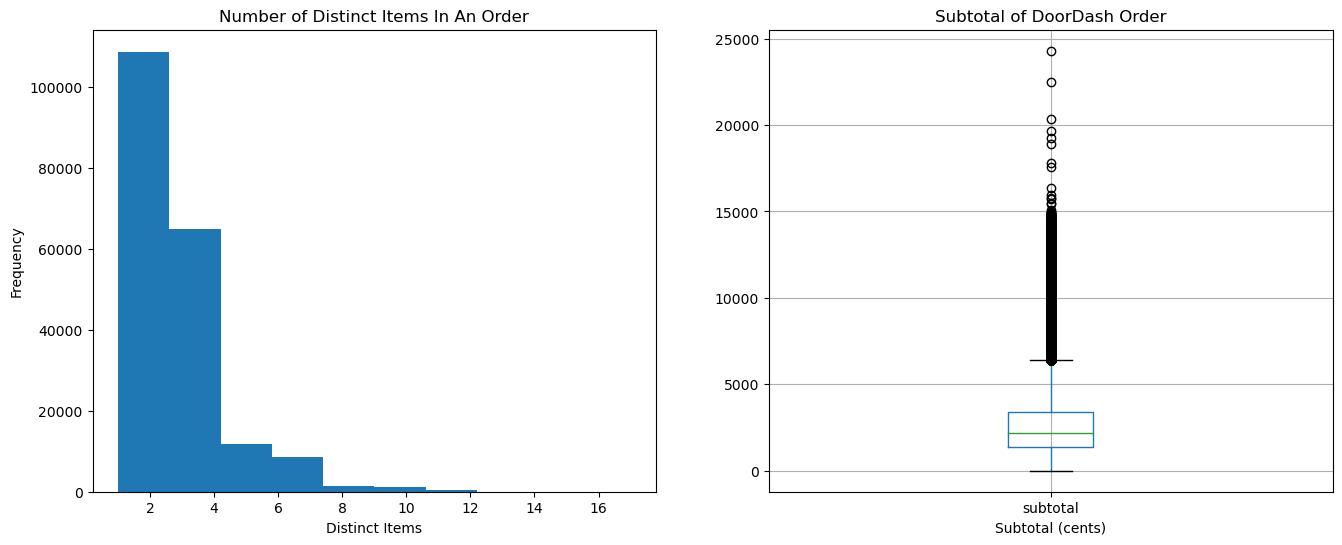

In [119]:
plt.figure(figsize = [16,6])
plt.subplot(1,2,1)
df.num_distinct_items.plot(kind='hist')
plt.xlabel('Distinct Items')
plt.title('Number of Distinct Items In An Order')

plt.subplot(1,2,2)
df[['subtotal']].boxplot()
plt.xlabel('Subtotal (cents)')
plt.title('Subtotal of DoorDash Order')

Text(0.5, 1.0, 'Total Items Per DoorDash Order')

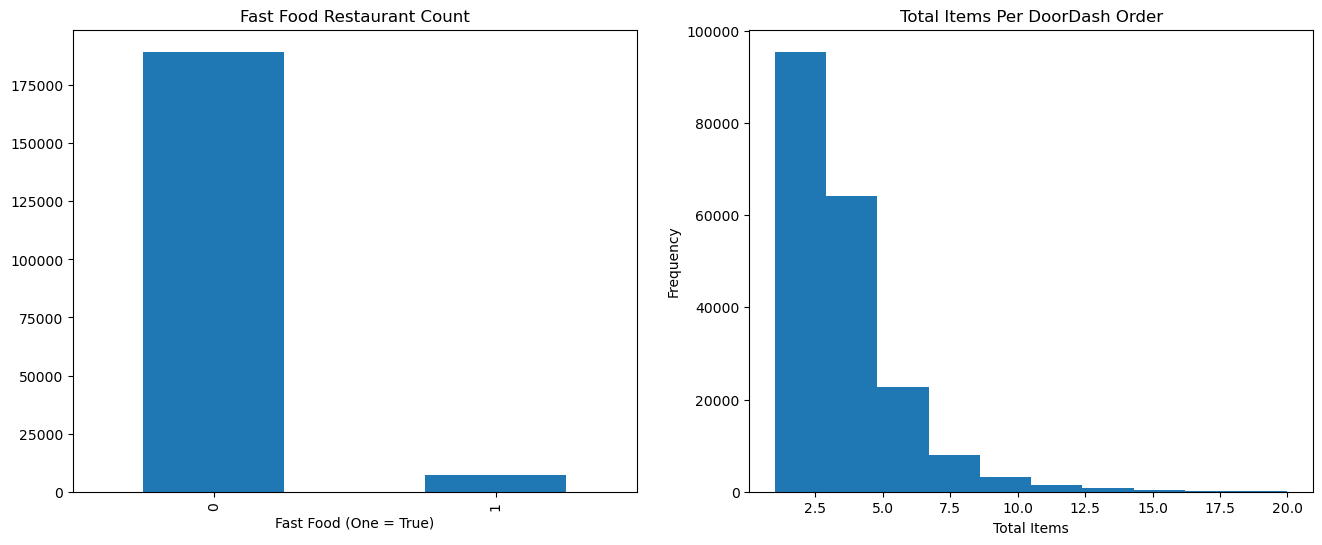

In [120]:
plt.figure(figsize = [16,6])
plt.subplot(1,2,1)
df.store_primary_category.value_counts().plot(kind='bar')
plt.xlabel('Fast Food (One = True)')
plt.title('Fast Food Restaurant Count')

plt.subplot(1,2,2)
df.total_items.plot(kind='hist')
plt.xlabel('Total Items')
plt.title('Total Items Per DoorDash Order')

Text(0.5, 0, 'Maximum Item Price (cents)')

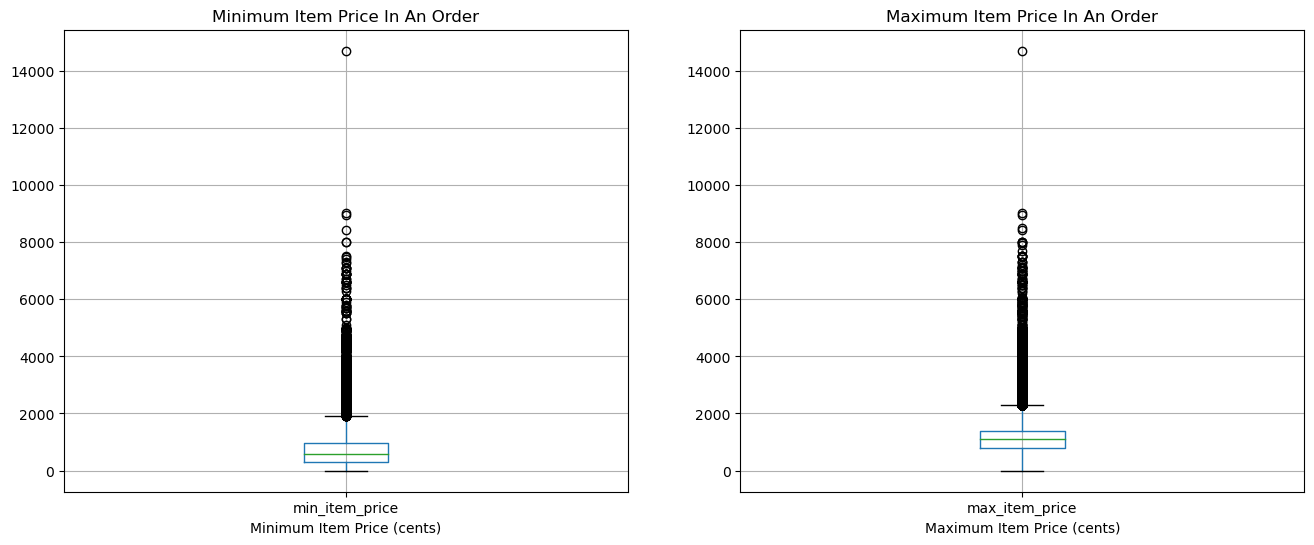

In [121]:
plt.figure(figsize = [16,6])
plt.subplot(1,2,1)
df[['min_item_price']].boxplot()
plt.title('Minimum Item Price In An Order')
plt.xlabel('Minimum Item Price (cents)')

plt.subplot(1,2,2)
df[['max_item_price']].boxplot()
plt.title('Maximum Item Price In An Order')
plt.xlabel('Maximum Item Price (cents)')

Text(0.5, 1.0, 'Amount of Onshift Dashers At Time of Order')

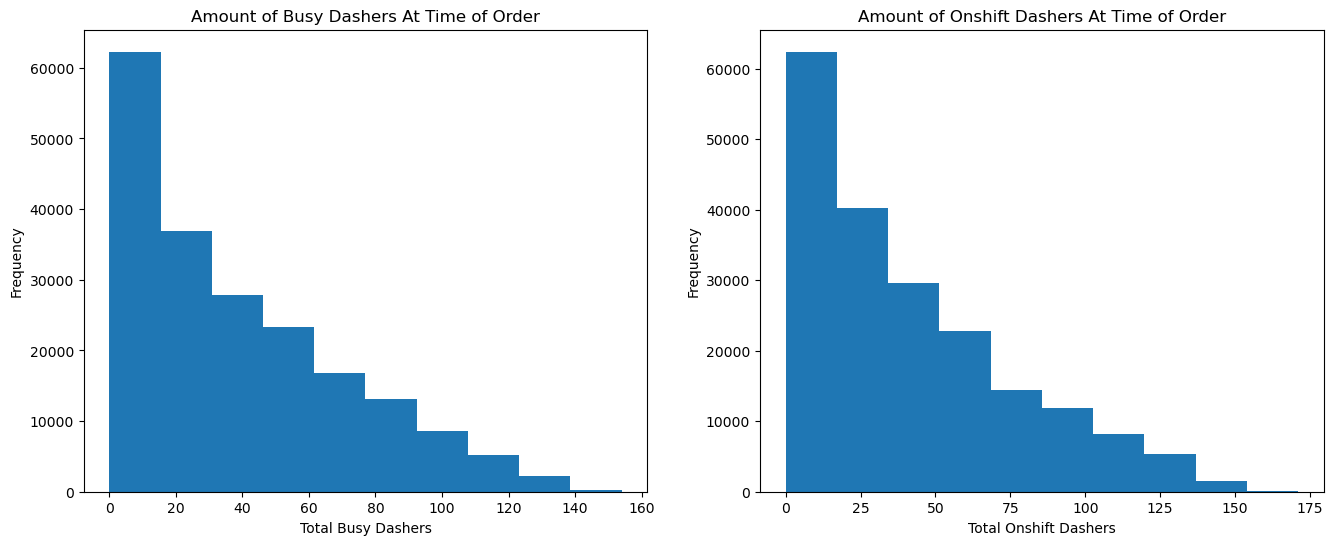

In [122]:
plt.figure(figsize = [16,6])
plt.subplot(1,2,1)
df.total_busy_dashers.plot(kind='hist')
plt.xlabel('Total Busy Dashers')
plt.title('Amount of Busy Dashers At Time of Order')

plt.subplot(1,2,2)
df.total_onshift_dashers.plot(kind='hist')
plt.xlabel('Total Onshift Dashers')
plt.title('Amount of Onshift Dashers At Time of Order')

Text(0.5, 1.0, 'Travel Time Between Store and Consumer Per Order')

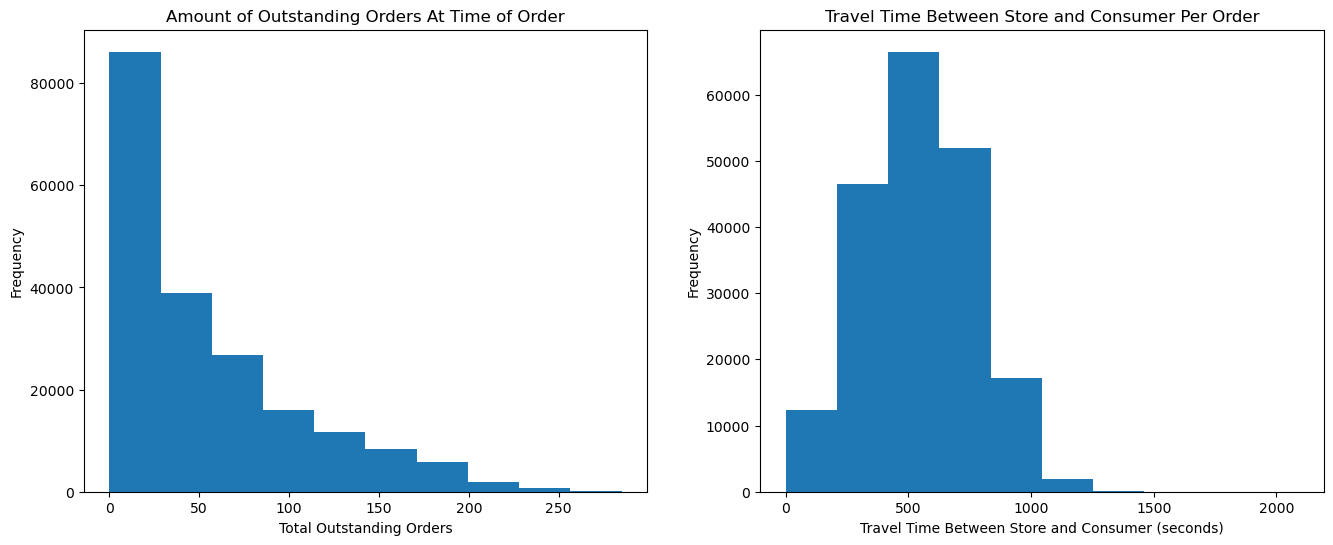

In [123]:
plt.figure(figsize = [16,6])
plt.subplot(1,2,1)
df.total_outstanding_orders.plot(kind='hist')
plt.xlabel('Total Outstanding Orders')
plt.title('Amount of Outstanding Orders At Time of Order')
plt.subplot(1,2,2)
df.estimated_store_to_consumer_driving_duration.plot(kind='hist')
plt.xlabel('Travel Time Between Store and Consumer (seconds)')
plt.title('Travel Time Between Store and Consumer Per Order')

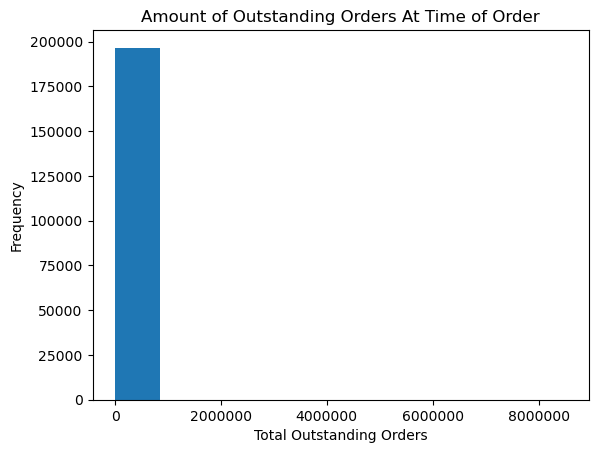

In [124]:
df.total_time.plot(kind='hist')
plt.xlabel('Total Outstanding Orders')
plt.title('Amount of Outstanding Orders At Time of Order')
plt.ticklabel_format(style='plain')


Before this, all the visuals seemed to display figures that seemed acceptable or normal until the total time variable where the outliers are so massive that it is disrupting the graph.

In [125]:
total_time = df.total_time > 10800
print(total_time.value_counts())

total_time
False    196405
True        138
Name: count, dtype: int64


Upon further investigation there 138 values above 10800 seconds (3 hours), this seems to be the main culprit. So, these values will be dropped.

In [126]:
df = df.drop(df[df.total_time > 10800].index)

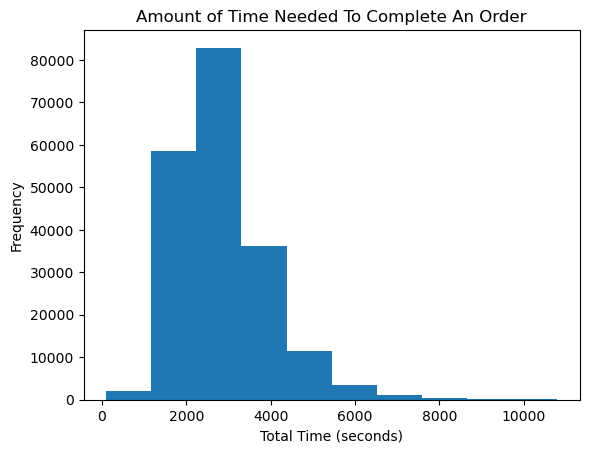

In [127]:
## data now looks presentable and what is expected
df.total_time.plot(kind='hist')
plt.xlabel('Total Time (seconds)')
plt.title('Amount of Time Needed To Complete An Order')
plt.ticklabel_format(style='plain')

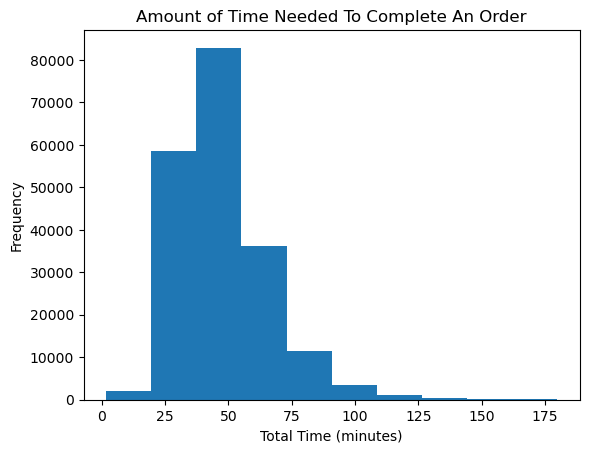

In [128]:
## data displayed in minutes for reference
df_min = df.total_time / 60
df_min.plot(kind='hist')
plt.xlabel('Total Time (minutes)')
plt.title('Amount of Time Needed To Complete An Order')
plt.ticklabel_format(style='plain')

All exploration has now been completed and the data is ready to be analyzed.

### D. ANALYSIS

In [129]:
## creating x variables
X_vars = df.drop(columns = ['total_time'])

#### To start, multicollinearity will be eliminated, wtih any variables with a VIF above 10 will be removed per industry standard. Starting with the highest variable (Corporate Finance Institute, 2023).


In [130]:
## total_on_shift_dashers will be removed
vif_vars = pd.DataFrame()
vif_vars["feature"] = X_vars.columns

vif_vars["Vif"] = [VIF(X_vars.values, i)
for i in range(len(X_vars.columns))]

vif_vars

,feature,Vif
0,store_primary_category,1.151568
1,total_items,13.822076
2,subtotal,11.324191
3,num_distinct_items,16.752846
4,min_item_price,5.126694
5,max_item_price,11.459782
6,total_onshift_dashers,30.945581
7,total_busy_dashers,29.479763
8,total_outstanding_orders,21.364153
9,estimated_store_to_consumer_driving_duration,5.046574


In [131]:
## total_busy_dashers will be removed
X_vars = df[['store_primary_category', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 
                 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']]
vif_vars = pd.DataFrame()
vif_vars["feature"] = X_vars.columns

vif_vars["Vif"] = [VIF(X_vars.values, i)
for i in range(len(X_vars.columns))]

vif_vars

,feature,Vif
0,store_primary_category,1.151567
1,total_items,13.821304
2,subtotal,11.322064
3,num_distinct_items,16.743226
4,min_item_price,5.124416
5,max_item_price,11.451411
6,total_busy_dashers,19.517710
7,total_outstanding_orders,16.899519
8,estimated_store_to_consumer_driving_duration,5.029016


In [132]:
## number of distinct items will be removed
X_vars = df[['store_primary_category', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 
                 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']]
vif_vars = pd.DataFrame()
vif_vars["feature"] = X_vars.columns

vif_vars["Vif"] = [VIF(X_vars.values, i)
for i in range(len(X_vars.columns))]

vif_vars

,feature,Vif
0,store_primary_category,1.151442
1,total_items,13.811005
2,subtotal,11.298426
3,num_distinct_items,16.720690
4,min_item_price,5.111092
5,max_item_price,11.414569
6,total_outstanding_orders,2.013212
7,estimated_store_to_consumer_driving_duration,4.963762


In [133]:
## max_item_price items will be removed
X_vars = df[['store_primary_category', 'total_items', 'subtotal', 'min_item_price', 'max_item_price', 
                 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration',]]
vif_vars = pd.DataFrame()
vif_vars["feature"] = X_vars.columns

vif_vars["Vif"] = [VIF(X_vars.values, i)
for i in range(len(X_vars.columns))]

vif_vars

,feature,Vif
0,store_primary_category,1.150140
1,total_items,7.209544
2,subtotal,10.655205
3,min_item_price,4.744382
4,max_item_price,10.986973
5,total_outstanding_orders,2.005496
6,estimated_store_to_consumer_driving_duration,4.671593


In [134]:
## all variables are now below a 10 in VIF, so analysis can resume
X_vars = df[['store_primary_category', 'total_items', 'subtotal', 'min_item_price', 
                 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']]
vif_vars = pd.DataFrame()
vif_vars["feature"] = X_vars.columns

vif_vars["Vif"] = [VIF(X_vars.values, i)
for i in range(len(X_vars.columns))]

vif_vars

,feature,Vif
0,store_primary_category,1.147219
1,total_items,7.041157
2,subtotal,7.578378
3,min_item_price,3.123013
4,total_outstanding_orders,1.973231
5,estimated_store_to_consumer_driving_duration,4.228254


Code for Linear Regression: (Statsmodels, 2013).

In [135]:
## Lin Reg model after removing 4 variables due to multicollinearity
## p value for store_primary_category is above 0.05 so it will be removed                      
y = df.total_time
X = X_vars
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             total_time   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     4473.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:00:14   Log-Likelihood:            -1.6384e+06
No. Observations:              196405   AIC:                         3.277e+06
Df Residuals:                  196398   BIC:                         3.277e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#### With all the "garbage" removed after filtering for high VIFs and p-values, the actual Linear Regression model can now be run.

In [136]:
### final Linear Regression model
X_vars = df[['total_items', 'subtotal', 'min_item_price', 
                 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']]
y = df.total_time
X = X_vars
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             total_time   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     5368.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:00:15   Log-Likelihood:            -1.6384e+06
No. Observations:              196405   AIC:                         3.277e+06
Df Residuals:                  196399   BIC:                         3.277e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

With the analysis techinque being Multiple Linear Regression, in theory this is a perfect fit for this kind of data and question. As, a MLR can help someone understand what variables explain the cause for another variable (IBM, 2021). However, after filtering for VIF and p-values which stop the model from suffering from multicollinearity and useless variables, half the explanatory variables had to be dropped. Then, once those were dropped, the model only has an R^2 of 0.120, which is not very good (and far from the goal set forth in the beginning).

The primary advantage using a techinque like VIF and filtering for p-values is that it helps make the model more significant. For example, a model can have great "explantory power" with a high R^2 value, but if it lacks significance then what is the point. Being able to filter out non-important variables help creates an important model.

The primary disadvantage of using VIF to filter out variables, is that VIF does not tell the analyst why the collinearity is happening. For example, the first variable removed is on shift dashers, but the analyst is only left to infer why the variable should be removed rather than explicitly told why.

### E. DATA SUMMARY AND IMPLICATIONS

Can a Multiple Linear Regression Model effectively predict DoorDash delivery time? was the question asked to start this project with the null and alternative hypothesis being:

Null hypothesis- A Multiple Linear Regression model cannot predict delivery time with a R Squared above 0.75

Alternate Hypothesis- A Multiple Linear Regression model can predict delivery time with a R Squared above 0.75

Unfortunately, the null hypothesis has to be accepted meaning a model cannot predict DoorDash delivery time based on the R^2 value being only a 0.12. So, the equation given from the model is as follows:

Y(total_time) =  1760.57(constant) + 7.93(total_items) + 0.11(subtotal) + 0.02(min_item_price) + 2.85(total_outstanding_orders) + 1.11(estimated_store_to_consumer_driving_duration)

The equation can be understood as the coefficent corresponding to the variable it is assigned to is the effect on the y variable with a unit increase/decrease. For example, one increase in total items means a 8 second increase in the total_time variable. While, the variables itself and the model are "significant" according to the Prob (F-statistic) which is 0, and all variables have a p-value of 0. The model itself fails to explain to what variables can predict delivery time on a doordash order.

The limitation ran into when conducting this analysis is that over half the variables in the data set had to be dropped. Whether, it was for a lack of context in the variables or high multicollinearity. When losing almost 75% of the data set, the potential for the datasets explanatory power will diminish.

A recommended course of action based on the results of this analysis is continue to explore new possible data sources. As, the data used in this study had its fair share of problems with variables that lacked importance and multicollinearity. Then, because of this all variables left did not leave a model where recommendations could be made off the analysis. 

For two possible approaches for future studies, the first recommendation would be to see if DoorDash would release an updated version of the data set. The reason for this being simply that DoorDash started as a company in 2013, so by 2015 it was still a relatively new company. So, the data might of still been a little erratic as the company might of still be ironing out any efficiency problems with the company being new. In the year 2024, it is possible the data might be a little more normal or smoother by now compared to the orginal dataset.

The second recommendation is to find out which markets these restaurants belong to, as much is not offered from the data set itself. Orginally, the location and identity of the restaurants was kept out of the dataset out of privacy concerns. However, it may be possible to seek permission from doordash to give more identification on to what these restaurants are specifically, which may help the data set as more specifics in a dataset will never hurt.

### F. SOURCES

Ajay. (2023, March 11). Advantages and disadvantages of python. LinkedIn. https://www.linkedin.com/pulse/advantages-disadvantages-python-aj-p/ 

Bhandari, A. (2024, July 18). What is multicollinearity?: Causes, effects and detection using VIF. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/ 

Variance inflation factor (VIF). Corporate Finance Institute. (2023, November 22). https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/ 

DoorDash. (2020). DoorDash Dasher Support. https://help.doordash.com/dashers/s/article/Dasher-How-does-DoorDash-work?language=en_US#:~:text=DoorDash%20is%20a%20technology%20company,want%2C%20and%20how%20you%20want 

IBM. (2021, August 18). What is linear regression?. IBM. https://www.ibm.com/topics/linear-regression#:~:text=Linear%20regression%20fits%20a%20straight,a%20set%20of%20paired%20data 

Pandas.to_datetime. Pandas. (2024). https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 

StarAgile. (2023, January 16). Data visualization in R. staragile.com. https://staragile.com/blog/sas-vs-r-vs-python 

Ordinary least squares. Statsmodels. (2013). https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html 


Suryaa, D. (2024, June 18). Doordash Eta Prediction. Kaggle. https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction/data 

